> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMBD movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue


### Question(s) for Analysis
#### What is the number of movies preduced every year?
#### What is the most popular movie genre for each year?
#### Does spending more money is associated with higher popularity ?
#### Does spending more money is associated with higher users ratings?
#### What kinds of properties are associated with movies that have high revenues?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv ('tmdb-movies.csv')
#   types and look for instances of missing or possibly errant data.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Explore our data Set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#Check for duplicates 
df.duplicated().sum()

1

In [7]:
df['imdb_id'].duplicated().sum()

10

There ar some duplicates in our data which will be removed in the next process

In [8]:
#Check for missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There arae some missing values in our dataset we'll deal with them in the data cleaning stage


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [10]:
#Drop the duplicates from our data set 
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
#Chec if we have any repeated movie in our data set
df['id'].duplicated().sum()

0

In [12]:
#drop unnecessary columns
drop_list = ['id','imdb_id','homepage','tagline','keywords','production_companies','cast','director','overview','budget_adj','revenue_adj']
df.drop(drop_list, axis = 1 , inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   runtime         10865 non-null  int64  
 5   genres          10842 non-null  object 
 6   release_date    10865 non-null  object 
 7   vote_count      10865 non-null  int64  
 8   vote_average    10865 non-null  float64
 9   release_year    10865 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 933.7+ KB


As we will do some analysis related to the movie genre, So we will remove any row with missing values to validate our outcomes

In [14]:
#Drop any row with missing values 
df.dropna(subset='genres',inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10842 non-null  float64
 1   budget          10842 non-null  int64  
 2   revenue         10842 non-null  int64  
 3   original_title  10842 non-null  object 
 4   runtime         10842 non-null  int64  
 5   genres          10842 non-null  object 
 6   release_date    10842 non-null  object 
 7   vote_count      10842 non-null  int64  
 8   vote_average    10842 non-null  float64
 9   release_year    10842 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 931.7+ KB


In order to avoid missleading results we need to convert data type of 'release_year' to be (string) and 'release_date' to (datetime)

In [16]:
#Change the type of 'release_year' column
df['release_year'] =df['release_year'].astype('str')

In [17]:
#Change the type of 'release_date' column
df['release_date'] = pd.to_datetime(df['release_date'])

In [18]:
#Make sure that changes are made 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10842 non-null  float64       
 1   budget          10842 non-null  int64         
 2   revenue         10842 non-null  int64         
 3   original_title  10842 non-null  object        
 4   runtime         10842 non-null  int64         
 5   genres          10842 non-null  object        
 6   release_date    10842 non-null  datetime64[ns]
 7   vote_count      10842 non-null  int64         
 8   vote_average    10842 non-null  float64       
 9   release_year    10842 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 931.7+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Q1) What is the number of movies preduced every year?

===>Explore the number of movies preduced every year

In [19]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


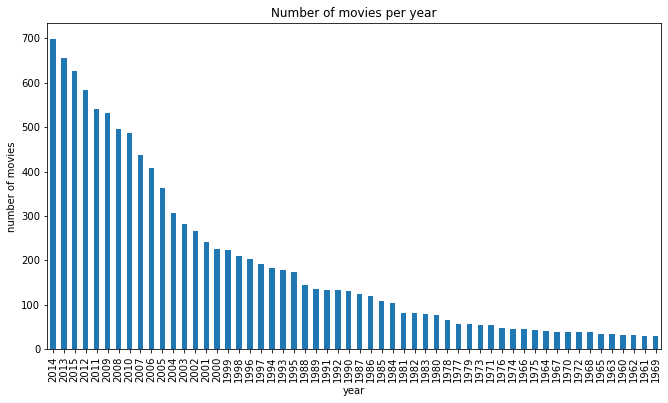

In [20]:
#A bar plot indicate the number of movies preduced every year 
df.release_year.value_counts().plot(kind = 'bar',xlabel ='year',ylabel='number of movies',title= 'Number of movies per year',figsize = (11,6));

Regarding this plot we can say that the number of movies preduced evry year is icreasing 

### Q2) What is the most popular movie genre for each year?

In [21]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [22]:
#Creating a function to split elements of 'genres' and creat dataframe with one gener per row :
def Split(df):
    df['genres'] = df['genres'].apply(lambda x : x.split("|"))
    df = df.explode('genres')
    return df

In [23]:
#create new dataframe with one element in 'geners' per row
df_exploded = Split(df)

In [24]:
#Check the new dataframe
df_exploded.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action,2015-06-09,5562,6.5,2015
0,32.985763,150000000,1513528810,Jurassic World,124,Adventure,2015-06-09,5562,6.5,2015
0,32.985763,150000000,1513528810,Jurassic World,124,Science Fiction,2015-06-09,5562,6.5,2015
0,32.985763,150000000,1513528810,Jurassic World,124,Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,2015-05-13,6185,7.1,2015


In [25]:
#Creating a function that divide the given column -with int & float dtypes- into particular categories  
def categorize (df,column,new_column):
    bin_edges = list(df[column].describe()[3:])
    bin_names = ['low','medium','relatively high','high']
    df[new_column] = pd.cut(df[column], bin_edges, labels = bin_names)
    return df

In [26]:
#Categorize popularity in df_explodded
categorize(df_exploded,'popularity','pop_level')

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,pop_level
0,32.985763,150000000,1513528810,Jurassic World,124,Action,2015-06-09,5562,6.5,2015,high
0,32.985763,150000000,1513528810,Jurassic World,124,Adventure,2015-06-09,5562,6.5,2015,high
0,32.985763,150000000,1513528810,Jurassic World,124,Science Fiction,2015-06-09,5562,6.5,2015,high
0,32.985763,150000000,1513528810,Jurassic World,124,Thriller,2015-06-09,5562,6.5,2015,high
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,2015-05-13,6185,7.1,2015,high
...,...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery,2066-01-01,11,6.5,1966,low
10863,0.065141,0,0,Beregis Avtomobilya,94,Comedy,2066-01-01,11,6.5,1966,low
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,Action,2066-11-02,22,5.4,1966,low
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,Comedy,2066-11-02,22,5.4,1966,low


In [27]:
#Group df_exploded by 'pop_level' and 'release_date' then extract the genres with highst pop_level
cat_df =df_exploded.groupby(['pop_level','release_year']).agg(lambda x:x.value_counts().index[0])
best_genre = cat_df.query('pop_level == "high"')['genres']
best_genre

pop_level  release_year
high       1960                      Drama
           1961                     Comedy
           1962                      Drama
           1963                     Comedy
           1964                     Comedy
           1965                      Drama
           1966                  Animation
           1967                  Adventure
           1968            Science Fiction
           1969                      Drama
           1970                  Adventure
           1971            Science Fiction
           1972                      Drama
           1973                      Drama
           1974                   Thriller
           1975                     Comedy
           1976                      Drama
           1977                  Adventure
           1978                     Horror
           1979            Science Fiction
           1980                      Drama
           1981                  Adventure
           1982               

### Q3) Does spending more money is associated with higher popularity ?

To Answer this question we will divide popiularity into 4 levels then find the crrelation between those levels and movie budget

In [28]:
#explore popularity
df.popularity.describe()

count    10842.000000
mean         0.647461
std          1.001032
min          0.000065
25%          0.208210
50%          0.384532
75%          0.715393
max         32.985763
Name: popularity, dtype: float64

In [29]:
#Categorize popularity in df
categorize (df,'popularity','pop_level')

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,pop_level
0,32.985763,150000000,1513528810,Jurassic World,124,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,5562,6.5,2015,high
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,"[Action, Adventure, Science Fiction, Thriller]",2015-05-13,6185,7.1,2015,high
2,13.112507,110000000,295238201,Insurgent,119,"[Adventure, Science Fiction, Thriller]",2015-03-18,2480,6.3,2015,high
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,"[Action, Adventure, Science Fiction, Fantasy]",2015-12-15,5292,7.5,2015,high
4,9.335014,190000000,1506249360,Furious 7,137,"[Action, Crime, Thriller]",2015-04-01,2947,7.3,2015,high
...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,[Documentary],2066-06-15,11,7.4,1966,low
10862,0.065543,0,0,Grand Prix,176,"[Action, Adventure, Drama]",2066-12-21,20,5.7,1966,low
10863,0.065141,0,0,Beregis Avtomobilya,94,"[Mystery, Comedy]",2066-01-01,11,6.5,1966,low
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,"[Action, Comedy]",2066-11-02,22,5.4,1966,low


In [30]:
#explore 'budget'
df.budget.describe()

count    1.084200e+04
mean     1.465531e+07
std      3.093971e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

We have zeros in 'budget' column which affect the statistic so we will remove these rows

In [31]:
#Creating a new dataframe that in which 'budget' not equal zero 
df1 = df.query('budget != 0')
df1.budget.describe()

count    5.168000e+03
mean     3.074552e+07
std      3.890583e+07
min      1.000000e+00
25%      6.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

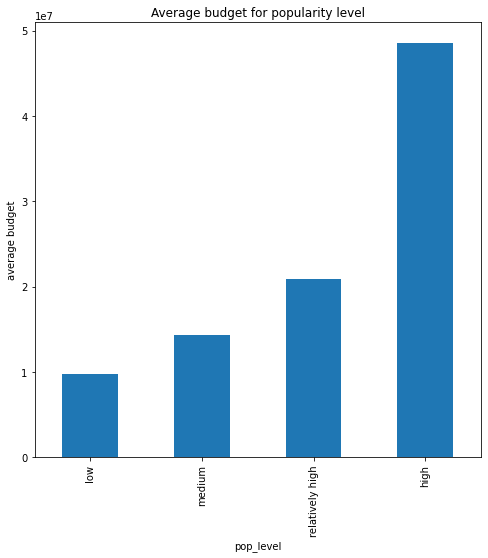

In [32]:
#plotting the average budget associated with popluarity level
df1.groupby('pop_level').mean()['budget'].plot(kind='bar',ylabel = 'average budget', title='Average budget for popularity level',figsize = (8,8));

We can see the the higher popularity level have higher average budget                           

#### Conclusion : the budget affect on the popularity of the movie 

### Q4) Does spending more money  is associated with higher users ratings?

To Answer this question we will divide users ratings into 4 categories then find the crrelation between these 4 categories and budget

In [33]:
#Categorize users ratings
categorize (df,'vote_average','rating_level')

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,pop_level,rating_level
0,32.985763,150000000,1513528810,Jurassic World,124,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,5562,6.5,2015,high,relatively high
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,"[Action, Adventure, Science Fiction, Thriller]",2015-05-13,6185,7.1,2015,high,high
2,13.112507,110000000,295238201,Insurgent,119,"[Adventure, Science Fiction, Thriller]",2015-03-18,2480,6.3,2015,high,relatively high
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,"[Action, Adventure, Science Fiction, Fantasy]",2015-12-15,5292,7.5,2015,high,high
4,9.335014,190000000,1506249360,Furious 7,137,"[Action, Crime, Thriller]",2015-04-01,2947,7.3,2015,high,high
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,[Documentary],2066-06-15,11,7.4,1966,low,high
10862,0.065543,0,0,Grand Prix,176,"[Action, Adventure, Drama]",2066-12-21,20,5.7,1966,low,medium
10863,0.065141,0,0,Beregis Avtomobilya,94,"[Mystery, Comedy]",2066-01-01,11,6.5,1966,low,relatively high
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,"[Action, Comedy]",2066-11-02,22,5.4,1966,low,low


In [34]:
#creating a new dataframe which contain 'rating_level' & budget not equal zero
df1_2 = df.query('budget != 0')

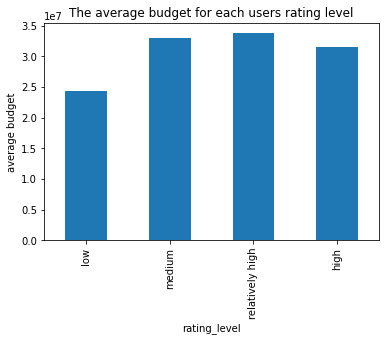

In [35]:
#plotting the average budget associated with each users rating level
df1_2.groupby('rating_level').mean()['budget'].plot(kind='bar',ylabel='average budget',title = 'The average budget for each users rating level');

### In Q3 & Q4 we discussed the relation between budget and two variables and made bar plot for each, In the next lines we will combine the two plots in order to show the average budget for each variable

In [36]:
#Highgts of pop_level
pop =list(df1.groupby('pop_level').mean()['budget'])

In [37]:
#Hights of rating_level
rating = list(df1_2.groupby('rating_level').mean()['budget'])

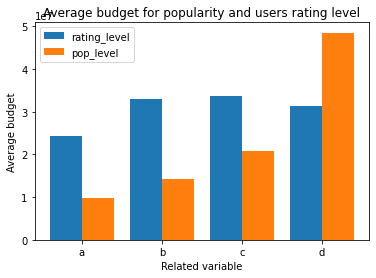

In [38]:
x = np.arange(len(rating))
plt.bar(x-0.2,rating,0.4,label = 'rating_level')
plt.bar(x+0.2,pop,0.4,label = 'pop_level')
plt.xticks(x,['a','b','c','d'])
plt.title('Average budget for popularity and users rating level')
plt.xlabel('Related variable')
plt.ylabel('Average budget')
plt.rcParams["figure.figsize"]=(11,8)
plt.legend()
plt.show()

#### Conclusion : Users ratings don't depend on budget  but ther is a quite positive correlation between budget and popularity

### Q5) What kinds of properties are associated with movies that have high revenues?

In [39]:
#Explore 'revenue'
df.revenue.describe()

count    1.084200e+04
mean     3.991138e+07
std      1.171179e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.414118e+07
max      2.781506e+09
Name: revenue, dtype: float64

We have zeros in 'revenue' column which affect the statistic so we will remove these rows

In [40]:
#Eleminating rows where 'revenue' = 0
df3= df.query('revenue != 0')


In [41]:
df3.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,pop_level,rating_level
0,32.985763,150000000,1513528810,Jurassic World,124,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,5562,6.5,2015,high,relatively high
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,"[Action, Adventure, Science Fiction, Thriller]",2015-05-13,6185,7.1,2015,high,high
2,13.112507,110000000,295238201,Insurgent,119,"[Adventure, Science Fiction, Thriller]",2015-03-18,2480,6.3,2015,high,relatively high
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,"[Action, Adventure, Science Fiction, Fantasy]",2015-12-15,5292,7.5,2015,high,high
4,9.335014,190000000,1506249360,Furious 7,137,"[Action, Crime, Thriller]",2015-04-01,2947,7.3,2015,high,high


In [42]:
#Create a dataframe where revenue value is higher than the average value
best_rev = df3.query('revenue > revenue.mean()')

In [43]:
best_rev.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average
count,1328.000000,1.328000e+03,1.328000e+03,1328.000000,1328.000000,1328.000000
mean,2.038197,6.771466e+07,2.618895e+08,114.825301,1121.176958,6.364684
std,2.100792,5.342210e+07,2.310465e+08,26.146210,1225.663674,0.703299
min,0.073493,0.000000e+00,8.928991e+07,72.000000,10.000000,4.100000
25%,0.979581,3.000000e+07,1.224163e+08,99.000000,331.750000,5.900000
50%,1.495858,5.500000e+07,1.792393e+08,112.000000,683.000000,6.400000
75%,2.392405,9.000000e+07,3.069756e+08,126.250000,1407.500000,6.900000
max,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])